In [83]:
import pandas as pd
import numpy as np

In [84]:
atributes = [ 'Class', 'age', 'menopause', 'tumor-size' ,'inv-nodes', 'node-caps', 'deg-malig' ,'breast', 'breast-quad', 'irradiat']
missing = [np.nan , None , "" , "?"]
df = pd.read_csv('./data/breast-cancer.csv', names=atributes, na_values=missing) 
print(df.head())

                  Class    age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   deg-malig breast breast-quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no  


In [85]:
for i in df:
    print(df[i].unique())
print(df.size)


['no-recurrence-events' 'recurrence-events']
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
['premeno' 'ge40' 'lt40']
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
['no' 'yes' nan]
[3 2 1]
['left' 'right']
['left_low' 'right_up' 'left_up' 'right_low' 'central' nan]
['no' 'yes']
2860


In [86]:
for i in df:
    print('Sum values for {} : \n {} '.format(i, df[i].value_counts()))
    print('=='*10)

Sum values for Class : 
 no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64 
Sum values for age : 
 50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64 
Sum values for menopause : 
 premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64 
Sum values for tumor-size : 
 30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
50-54     8
0-4       8
5-9       4
45-49     3
Name: tumor-size, dtype: int64 
Sum values for inv-nodes : 
 0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64 
Sum values for node-caps : 
 no     222
yes     56
Name: node-caps, dtype: int64 
Sum values for deg-malig : 
 2    130
3     85
1     71
Name: deg-malig, dtype: int64 
Sum values for breast : 
 left     152
right    134
Name: breast, dtype: int64 
Sum values for breast-quad : 
 left_low     110
left_up       97
right_up

In [87]:
for i in df:
    print("sum of nans in {} : {} ".format(i,df[i].isna().sum() ))
print(df)

sum of nans in Class : 0 
sum of nans in age : 0 
sum of nans in menopause : 0 
sum of nans in tumor-size : 0 
sum of nans in inv-nodes : 0 
sum of nans in node-caps : 8 
sum of nans in deg-malig : 0 
sum of nans in breast : 0 
sum of nans in breast-quad : 1 
sum of nans in irradiat : 0 
                    Class    age menopause tumor-size inv-nodes node-caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
281     recurrence-events  30-39   premeno      30-34       0-2        no   
282     recurrence-events  30-39   premeno      20-24       0-2        no   
283     recurrence

In [88]:
#mono 9 nan exei as ta diagrapsoume 
df["node-caps"].dropna(inplace=True)
df["breast-quad"].dropna(inplace=True)


### convert the strings (ages, tumor-size,inv-nodes) into numericals

In [89]:
# '30-39' '40-49' '60-69' '50-59' '70-79' '20-29'
ages = []
for row in df["age"]:
    if row == "20-29":
        ages.append(0)
    elif row == "30-39":
        ages.append(1)
    elif row == "40-49":
        ages.append(2)
    elif row == "50-59":
        ages.append(3)
    elif row == "60-69":
        ages.append(4)
    elif row == "70-79":
        ages.append(5)
    else :
        ages.append(6)
        
# print(ages)
ages_df = pd.DataFrame(ages)
df["age"] = ages_df
# print(df["ages"])

### gia tumor-size
sizes_table = []
for row in df["tumor-size"]:
#     print(row)
    if row == '0-4':
        sizes_table.append(0)
    elif row == '5-9':
        sizes_table.append(1)
    elif row == '10-14':
        sizes_table.append(2)
    elif row == '15-19':
        sizes_table.append(3)
    elif row == '20-24':
        sizes_table.append(4)
    elif row == '25-29':
        sizes_table.append(5)
    elif row == '30-34':
        sizes_table.append(6)       
    elif row == '35-39':
        sizes_table.append(7)       
    elif row == '40-44':
        sizes_table.append(8)
    elif row == '45-49':
        sizes_table.append(9)
    elif row == '50-54' :
        sizes_table.append(10)
        
# print(sizes_table)
sizes_table_df = pd.DataFrame(sizes_table)
df["tumor-size"] = sizes_table_df
# print(df["tumor-size"])


### '0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26'
### gia inv-nodes
table = []
for row in df["inv-nodes"]:
#     print(row)
    if row == '0-2':
        table.append(0)
    elif row == '3-5':
        table.append(1)
    elif row == '6-8':
        table.append(2)
    elif row == '9-11':
        table.append(3)
    elif row == '12-14':
        table.append(4)
    elif row == '15-17':
        table.append(5)
    elif row == '24-26':
        table.append(6)       
    
        
# print(sizes_table)
table_df = pd.DataFrame(table)
df["inv-nodes"] = table_df
# print(df["tumor-size"])


    
    


In [90]:
#convert string to numerical 
#categoricals : Class  , menopause ,breast ,breast-quad ,   "node-caps" 

dummies = pd.get_dummies(df , dummy_na=False ,columns=["Class"  , "menopause" ,"breast" ,"breast-quad" , "node-caps"], drop_first=True) 
df1 = pd.concat([df,dummies] ,copy = False,axis= 1) 
df1.drop_duplicates()
print(df1)

                    Class  age menopause  tumor-size  inv-nodes node-caps  \
0    no-recurrence-events    1   premeno           6          0        no   
1    no-recurrence-events    2   premeno           4          0        no   
2    no-recurrence-events    2   premeno           4          0        no   
3    no-recurrence-events    4      ge40           3          0        no   
4    no-recurrence-events    2   premeno           0          0        no   
..                    ...  ...       ...         ...        ...       ...   
281     recurrence-events    1   premeno           6          0        no   
282     recurrence-events    1   premeno           4          0        no   
283     recurrence-events    4      ge40           4          0        no   
284     recurrence-events    2      ge40           6          1        no   
285     recurrence-events    3      ge40           6          1        no   

     deg-malig breast breast-quad  irradiat  ...  irradiat  \
0            

In [91]:
#drop the origin categorical values 

df1.drop(columns = [ "menopause" ,"breast" ,"breast-quad" , "node-caps" ] ,inplace=True) 
map1={"no": 0 , "yes":1 }
df1["irradiat"] = df1["irradiat"].replace(pd.Series(map1)    ) 
df1["Class"] = df1["irradiat"].replace("no-recurrence-events", 0)
df1["Class"] = df1["irradiat"].replace("recurrence-events", 1)


In [92]:
full_dataset = df1.loc[:,~df1.columns.duplicated()]
full_dataset

,Class,age,tumor-size,inv-nodes,deg-malig,irradiat,Class_recurrence-events,menopause_lt40,menopause_premeno,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,node-caps_yes
0,0,1,6,0,3,0,0,0,1,0,1,0,0,0,0
1,0,2,4,0,2,0,0,0,1,1,0,0,0,1,0
2,0,2,4,0,2,0,0,0,1,0,1,0,0,0,0
3,0,4,3,0,2,0,0,0,0,1,0,1,0,0,0
4,0,2,0,0,2,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0,1,6,0,2,0,1,0,1,0,0,1,0,0,0
282,1,1,4,0,3,1,1,0,1,0,0,1,0,0,0
283,0,4,4,0,1,0,1,0,0,1,0,1,0,0,0
284,0,2,6,1,3,0,1,0,0,0,1,0,0,0,0


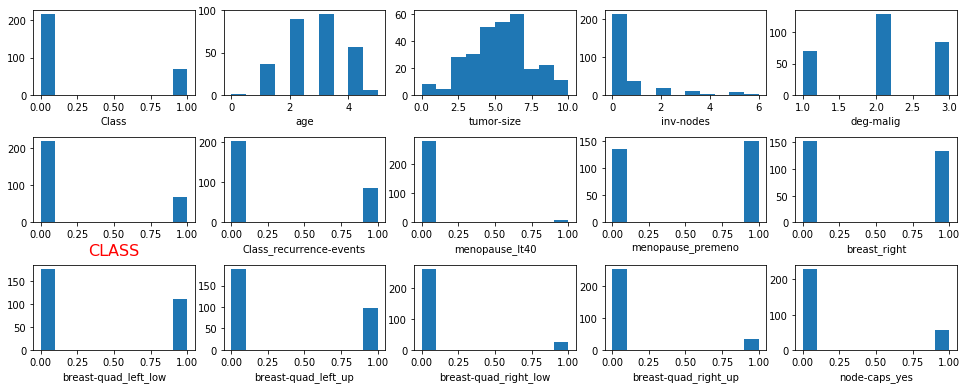

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns 
#print(df1.columns)
#for i in df1:
#    print(i)
fig ,ax = plt.subplots( 3,5 , figsize=(19,7))
plt.subplots_adjust(  right=0.8, top=0.8 ,wspace = 0.18, hspace=  0.5)

j=1

for i in full_dataset:
   # print( i)
    
    plt.subplot( 3,5 ,j)
    plt.hist(full_dataset[i])
    if i == "irradiat" :  plt.xlabel('CLASS' , size=16 ,color='red' )
    else : plt.xlabel(i)
    
    plt.ylabel("")
    j+=1

In [94]:
correlations = full_dataset.corr()

Text(0.5, 1, 'Correlations ')

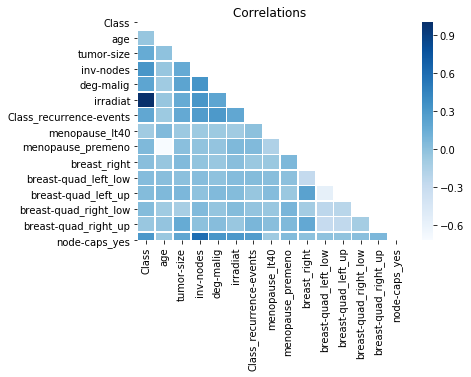

In [95]:
import seaborn as sns
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(correlations , mask=mask , xticklabels = correlations.columns, yticklabels=correlations.columns , linewidths= 0.5 , cmap='Blues')
plt.title("Correlations ")
# plt.close()

# # Machine Learning

### svm

In [99]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

data = full_dataset[["age","tumor-size","inv-nodes","deg-malig","irradiat","Class_recurrence-events","menopause_lt40","menopause_premeno","breast_right","breast-quad_left_low","breast-quad_left_up","breast-quad_right_low","breast-quad_right_up","node-caps_yes"]]
# for i in full_dataset:
#     print(full_dataset[i])

res = full_dataset["Class"]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, res, test_size=0.2,random_state=30) # 70% training and 30% test



#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
